# 图像处理之动态范围扩展(HDR)

## 1、动态范围扩展定义

动态范围(Dynamic Range)是物理学中常见的概念，表示某一物理量最大值与最小值的比率，通常以对数表示，单位为dB。对于真实场景，它指场景中最明亮处与最黑暗处的亮度之比。自然景观的亮度范围覆盖非常之广，最大动态范围能达到160db，而人眼可以感知的亮度范围高达10个数量级。

现实中8比特量化的数字相机输出的图像只能记录有限范围的灰阶与颜色数，其动态范围只有两个数量级，远远小于常见的自然场景的动态范围及人眼所能感知的动态范围，数码相机动态范围不足的问题对其应用造成了较大的影响。鉴于该问题，需要我们进行动态范围扩展，从而让电子显示设备能够输出更宽动态范围的图像。

扩展数字成像系统的动态范围，即高动态范围成像技术(HDR)，指利用硬件或者软件的方法，使系统输出的图像包涵尽可能大的场景亮度范围，并准确地再现场景真实的细节信息。目前实现该技术的主要方法：软件扩展方法和硬件扩展方法。其中软件扩展方法主要分为辐照度重建法和直接融合法。

## 2、动态范围扩展方法

### 2.1 硬件扩展方法

硬件上限制数字成像系统动态范围的主要元件是图像传感器(sensor)，CCD／CMOS传感器的动态范围定义为饱和电荷量Qs与最小可探测电荷量Qd的比值如下。sensor动态范围主要受光敏器件的灵敏度、满阱容量和噪声水平等因素限制，而且传感器面积一定的条件下，提高像素数目与提高动态范围相互矛盾。因此在不减少图像传感器像素数目的条件下，提高动态范围需要增大图像传感器的面积，成本将会增加，成像系统的结构也可能受到影响。

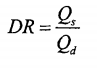

硬件扩展的另一方案是通过改变光学系统结构或添加其他元件改变图像传感器接收光能量，经后期处理实现动态范围扩展。如利用分光棱镜使入射光线在不同的靶面成像，采用不同灵敏度的传感器接收或设置不同的电路增益，再利用多个传感器获得的不同图像生成一幅高动态范围图像。
没有成熟可靠的方案。而且上述方法需要对相机或图像传感器进行改造，甚至重新设计，在硬件设备上花费了大量精力，制造成本也大大提高，不宜在一般的科研项目中采用。

### 2.2 软件扩展方法

软件扩展方法原理：对被摄场景进行多次曝光成像，通过设置不同的曝光时间，改变系统探测的亮度范围，获取多幅不同曝光度的图像，最后通过软件方法将它们合成一幅高动态范围图像，恢复场景的细节信息。如下图：

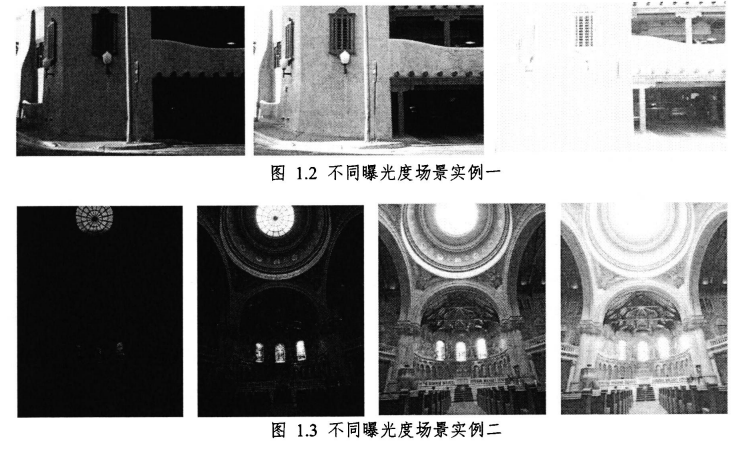

目前软件扩展方法主要有两种：基于相机响应函数(CRF)的辐照度重建和多曝光图像融合。

#### 2.2.1 辐照度重建方法

辐照度重建方法处理过程：静态场景拍摄多幅不同曝光度的低动态范围图像，利用图像信息推算成像系统的响应函数，再通过响应函数逆运算得到场景的相对辐照度，用以合成高动态范围图像，并以浮点数保存。其中，相机响应函数求解是关键的步骤 。

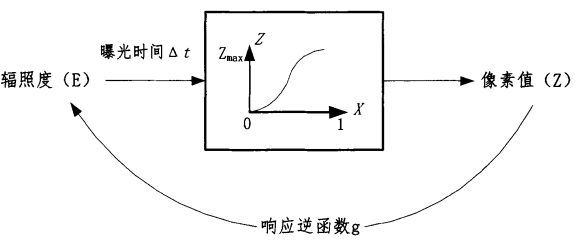

(1) 设相机和拍摄场景均处于静态，且曝光时间足够短，从而可以忽略拍摄过程场景的亮度变化 在多次曝光成像中，假设j次曝光时间为△t(j)。第i个像素接收的场景辐照度为E(i)，在获得的第j幅图像中，其像素值为Z(i,j)，公式如下：

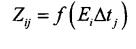

(2) 假设相机响应函数是一定区间下单调连续，即f函数可逆：

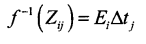

(3) 上述函数左右取对数，可得到：

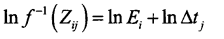

(4) 设置函数g = lnf-1，可简化为：

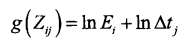

Delta t(j)和Z(i,j)为已知，函数g(z)和辐照度E(i)未知，其中Z(i,j)取值为离散且有限的，因此我们并不需要求解g(z)的完整解析式，只需在Z的取值范围中恢复g(Z)的有限个取值即可。假设像素值的最大值和最小值分别为Zmax和Zmin。像素采样点为N，曝光次数为P。为了确定(Zmax-Zmin+1)个g(z)和N个E(i)的值，使之满足上述公式，定义如下目标函数：

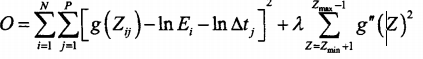

目标函数第一项是为了使所求得的解具有最小的方差，第二项则是对函数g进行平滑约束，其中r为平滑约束权重。此外，在过度曝光和曝光不足的区域，受传感器动态范围及噪声影响，像素点的输出值往往不够稳定。为此，引入权重函数W(z)，衡量像素值的可信程度，减小边界采样对求解函数g的影响。

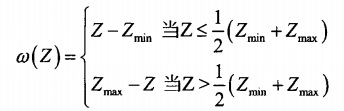

此时目标函数修改为：

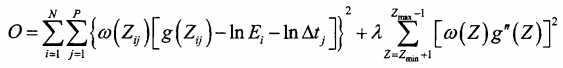

至此，函数g的求解变为目标函数的最小化问题。由于甙z)的取值有限，只要选取足够的采样点，就可以将目标函数转化为一个超定方程组，可以通过奇异值分解求得甙z)的最小二乘解，进而利用单调性计算出相机响应函数。如下一组多曝光LDR图计算后的相机响应函数如下：

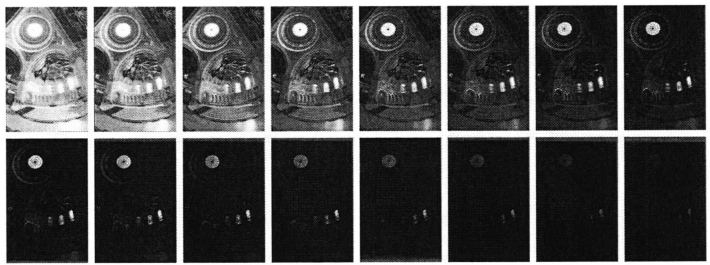

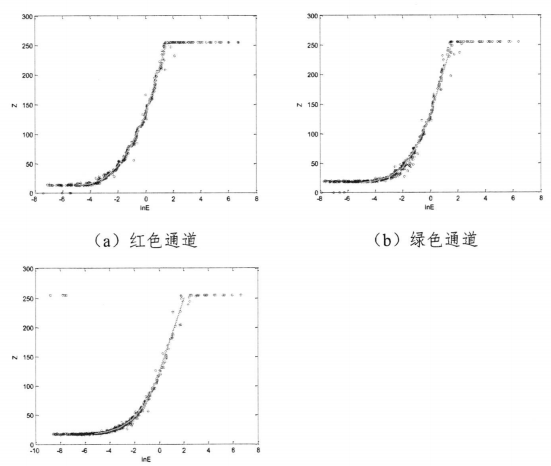

(5) 根据上述步骤即可得到相机的响应函数，则场景相对辐照度计算较为容易，如下式：

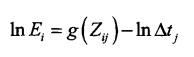

通常，为了降低图像噪声及饱和像素值的影响，在计算第i个像素对应的辐照度时，尽可能地利用其在所有输入图像中的像素值，并再次引入权重函数w(z)。通过如下公式计算：

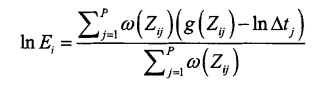

在获得场景的相对辐照度数据后，将其以特定的图像格式存储，一就得到了场景的高动态范围图像。在处理彩色图像时，可以有两种方法。一种方法是分R、G、B三个颜色通道计算相机响应函数，求出各通道对应的相对辐照度，最后调节比例参数进行白平衡处理。另一种方法是，将RGB图像转换至HSV空间，恢复V通道的高动态范围数据。

### 2.2.2 多曝光图像融合

辐照度重建法合成的HDR图像质量十分地依赖于相机响应函数的计算精度，拍摄过程相机抖动或景物微小移动会对计算结果造成较大影响，因此最新提出了多曝光融合方法。从图像融合的角度出发，从曝光度不同的LDR图像序列提取信息合成一幅高质量LDR图像，其视觉效果相当于一幅局部自适应曝光的“高动态范围图像”。常见的多曝光融合方法可以分为像素级融合、特征级融合 、决策级融合。

像素级融合主要针对原始图像数据进行融合，融合前未进行图像综合分析与处理。这一层次的融合数据准确性最高，能够提供丰富、可靠的细节信息，应用最为广泛 。

特征级融合则针对图像特征信息进行融合。首先从原始数据中提出特征信息，如边缘、纹理、运动方向、视觉显著性等，然后进行特征分析与综合处理。相比于像素级融合，特征级融合能够降低噪声影响，提高鲁棒性。

决策级融合是层次最高的信息融合，模拟人类学习与思考过程，对图像信息进行逻辑推理与统计分析，设定一定规则对信息进行融合。

本文描述的是基于曝光适度评价的快速融合，属于特征级融合范围。曝光适度评价的快速融合是指使用权值图对不同曝光度图像序列进行加权融合，因此，高效确定融合权重值的成像质量评价标准是算法研究的关键。算法流程如下：

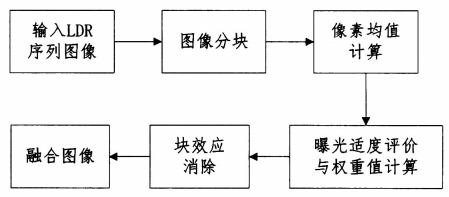

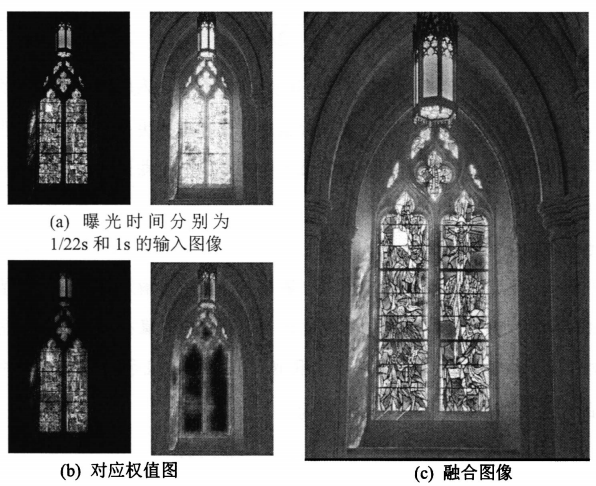

##### (1) 曝光适度评价

早期曝光适度评价方法：以像素的归一化像素值与O，5的接近程度评价曝光适度，其评价数值体现为像素的融合权重分量，并利用高斯模型进行计算，权重值计算如下：

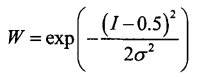

该权重公式可以尽可能地保留每幅输入图像中像素值在0.5附近的像素信息，这样容易丢失场景灰暗和明亮处的细节。因为以固定值0.5作为最佳像素值不能显著区分这些区域内不同像素间的差异，不利于提取区域内的细节信息。 因此为了保证图像信息没有丢失，将0.5修改为像素均值方式。对于同一场景的N幅不同曝光度图像，以I(i,x，Y)表示第i幅图像中坐标为(x，Y)处的像素，其曝光适度评价指标为：

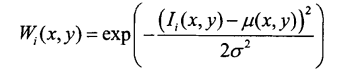

其中：

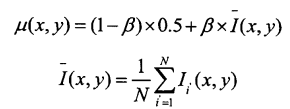

从上述公式中，一方面，为保证较为理想的人眼视觉感受，u(x，y)的取值应在0.5附近；另一方面，为体现场景真实的亮暗对比信息，需从场景有限次数的采样中近似地获取其亮度信息。u(x,y)取O．5与该均值的加权和，权重因子p为细节信息与亮暗对比信息平衡参数。

##### (2) 分块处理

根据实验测试验证，若使用上述曝光适度评价方法获得的权重值对输入图像直接进行加权融合，生成图像会出现像素值变化过快、颜色异常的现象 ，如下图：

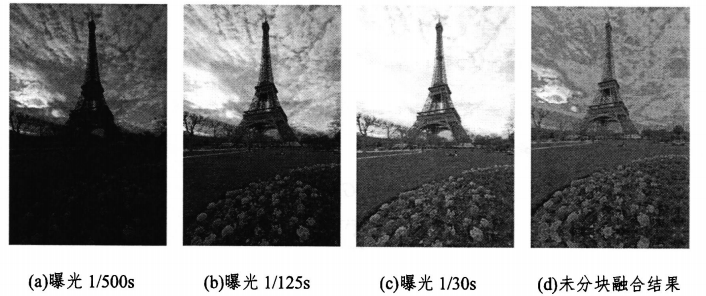

基于图像区域分析的融合算法具有较高的鲁棒性，将图像划分为不同区域，并将上述曝光适度评价方法应用于图像分块区域，既能保留景物的局部特性，又能避免随机噪声影响，同时还可以大幅度提高计算效率。将图像分割为均匀大小的矩形分块。将每幅输入图像分割为b×b大小的M个矩形分块，以B(i,j)表示第i幅图像的第j个分块。为了综合图像的局部特性，计算每个分块的像素值均值 ：

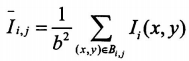

利用上述曝光适度评价方法对分块图像的成像质量进行衡量，以分块均值作为该分块区域的“像素值”，并将分块区域视为单个“像素"，利用权重公司计算得到每个分块对应的曝光适度评价值。若分块内的像素直接以该评价值作为权重值，进行融合，融合图像会在分块边界处出现明显的不连续现象，需要进一步处理融合图像以消除图像块效应。

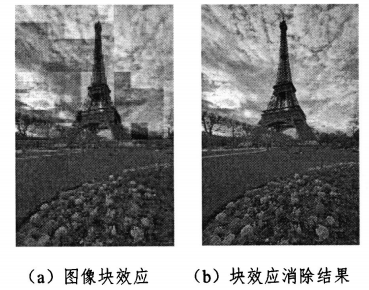

因此，需要基于分块模式优化权重图，考虑块内部像素分布，针对分块B(i,j)内位置坐标为(x，y)的像素，利用B(i,j)的8邻域内的分块曝光适度评价值联合确定该像素的权重值：

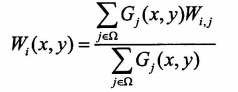

其中融合函数G(x，y)为峰值位于分块中心的二维高斯函数，高斯标准差、 的取值与分块宽度b有关：

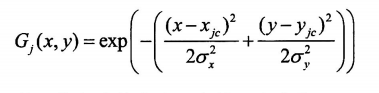

##### (3) 图像融合

将前面得到各输入图像的权值图，对其做归一化处理使得融合结果连续而自然，公式如下：

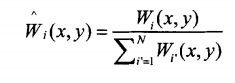

归一化权值图形，(x，Y)与对应曝光度图像加权叠加即可得到最终的融合图像：

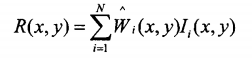

在处理彩色图像时，算法注重场景的亮度信息，因此将输入图像转换到YCbCr空间，对亮度信息和颜色信息分别进行处理。此外，在计算Cb、Cr色差通道数据时，将曝光适度评价中的u(x,y)设置为固定值0.5，并省略公式分块权重值融合的步骤，结果表明，仍可得到良好的融合效果，进一步减少了算法的运算量，提高了计算效率。

来源：

[1].http://www.cnblogs.com/qiqibaby/p/8747336.html